Importing and Exporting Data with Pandas

In [4]:
#importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
col_names= ["petal_length_in_cm","petal_width_in_cm","sepal_length_in_cm","sepal_width_in_cm","Class"]

In [7]:
iris_data = pd.read_csv("/content/iris.data",names=col_names)
iris_data.head()

,petal_length_in_cm,petal_width_in_cm,sepal_length_in_cm,sepal_width_in_cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   petal_length_in_cm  150 non-null    float64
 1   petal_width_in_cm   150 non-null    float64
 2   sepal_length_in_cm  150 non-null    float64
 3   sepal_width_in_cm   150 non-null    float64
 4   Class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_data.isnull().sum()

petal_length_in_cm    0
petal_width_in_cm     0
sepal_length_in_cm    0
sepal_width_in_cm     0
Class                 0
dtype: int64

In [10]:
iris_data.describe()

,petal_length_in_cm,petal_width_in_cm,sepal_length_in_cm,sepal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data=iris_data.to_numpy()

In [12]:
dataset=data[:,:-1]

In [13]:
df = pd.DataFrame(dataset, index=dataset[:,0])

In [14]:
df.kurt(axis=1)

5.1   -2.368842
4.9   -1.091924
4.7   -2.276657
4.6    -1.57517
5.0   -2.787004
         ...   
6.7   -2.983606
6.3   -3.790103
6.5   -3.127297
6.2   -3.387994
5.9   -3.345923
Length: 150, dtype: object

In [15]:
df.to_csv("cleaned_iris_data.csv")

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [22]:
for train_index, test_index in split.split(X=iris_data, y=iris_data['Class']):
    strat_train_set = iris_data.loc[train_index]
    strat_test_set = iris_data.loc[test_index]

In [23]:
strat_test_set['Class'].value_counts() / len(strat_test_set)

Class
Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: count, dtype: float64

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Class', axis=1, inplace=True)

In [25]:
strat_train_set.shape, strat_test_set.shape

((120, 4), (30, 4))

In [26]:
iris= strat_train_set.copy()

In [28]:
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'show'

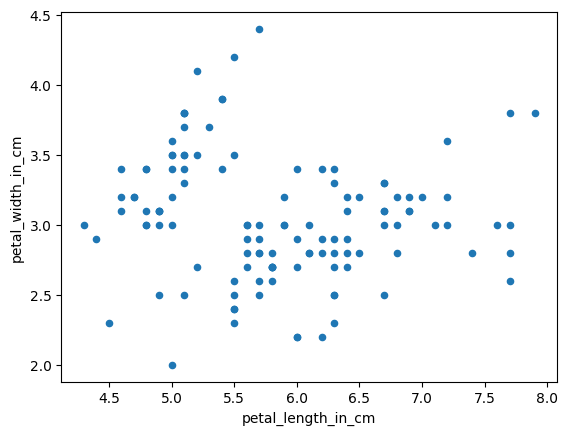

In [30]:
iris.plot(kind='scatter', x='petal_length_in_cm', y='petal_width_in_cm')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

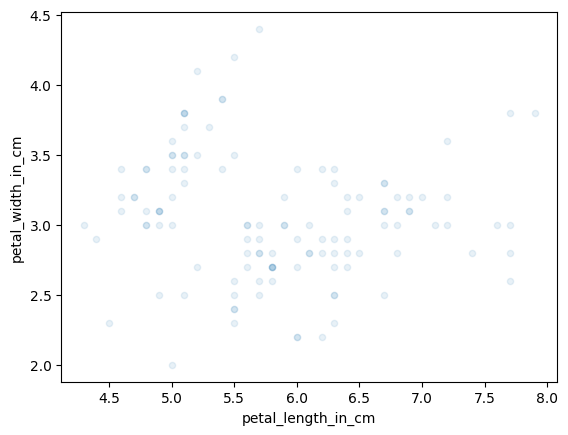

In [31]:

iris.plot(kind='scatter', x='petal_length_in_cm', y='petal_width_in_cm', alpha=0.1)
plt.show()

In [35]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(iris)

SimpleImputer(strategy='median')